# Passenger satisfcatory rate prediction 

# Overview
* This data given by an airline organization. The actual name of the company is not given due to various purposes that's why the name Invistico airlines.

* The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.

* The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.

* Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

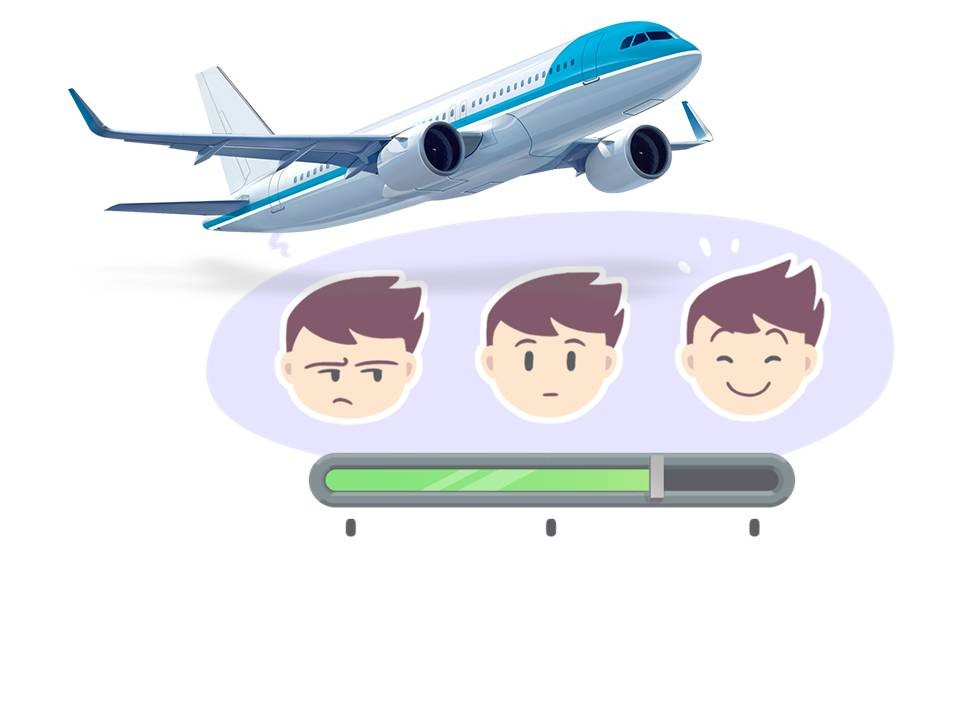

# Need of  passenger satisfaction rate prediction:
1. Customer-centric approach: Airlines strive to provide exceptional customer experiences and maintain high levels of passenger satisfaction.

2. Competitive advantage: In the highly competitive airline industry, passenger satisfaction is a key differentiating factor. Airlines that consistently deliver a high level of customer satisfaction are likely to attract more passengers, gain customer loyalty, and outperform their competitors.

3. Service improvement and resource optimization: Predicting passenger satisfaction helps airlines identify areas of improvement in their operations, services, and customer interactions. 

4. Risk mitigation: Predicting passenger satisfaction allows airlines to anticipate and mitigate potential risks or issues that may negatively impact customer experience. 

# Table of content
1. Importing libraries

2. Exploratory Data Analysis

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
import warnings
warnings.filterwarnings("ignore")

# Now lets import the Airline dataset.

In [2]:
df = pd.read_csv("D:\Projects Datasets/Invistico_Airline.csv")
df

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


# 2. Exploratory Data Analysis

In order to categorise the features and smoothing my EDA section, let's study the datatype of my features.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer_Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight_Distance                    129880 non-null  int64  
 7   Seat_comfort                       129880 non-null  int64  
 8   Departure_Arrival_time_convenient  129880 non-null  int64  
 9   Food_and_drink                     129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Inflight_wifi_service              1298

So my datatypes are object, float and integer.

Okay so now a statistical breakdown of my features would be helpful.

In [4]:
df.describe()

,Age,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


* 50% of my passengers are below 40 years of age and on an average travelling a distance of 1950 km.
* on an average delay in departure and arrival is about 15 min. 

Lets figure out the number of unique values in each feature so that features can be further divided in continuous, discrete and categorical data.

In [5]:
df.nunique().sort_values(ascending = False)

Flight_Distance                      5398
Arrival_Delay_in_Minutes              472
Departure_Delay_in_Minutes            466
Age                                    75
Inflight_entertainment                  6
Online_boarding                         6
Cleanliness                             6
Checkin_service                         6
Leg_room_service                        6
Onboard_service                         6
Ease_of_Online_booking                  6
Online_support                          6
Inflight_wifi_service                   6
Gate_location                           6
Food_and_drink                          6
Departure_Arrival_time_convenient       6
Seat_comfort                            6
Baggage_handling                        5
Class                                   3
Gender                                  2
Type_of_Travel                          2
Customer_Type                           2
satisfaction                            2
dtype: int64

Next, determine the null or nan values of the features as my data cleaning part.

In [6]:
df.isnull().sum().sort_values(ascending = False)

Arrival_Delay_in_Minutes             393
Inflight_entertainment                 0
Departure_Delay_in_Minutes             0
Online_boarding                        0
Cleanliness                            0
Checkin_service                        0
Baggage_handling                       0
Leg_room_service                       0
Onboard_service                        0
Ease_of_Online_booking                 0
Online_support                         0
satisfaction                           0
Gender                                 0
Gate_location                          0
Food_and_drink                         0
Departure_Arrival_time_convenient      0
Seat_comfort                           0
Flight_Distance                        0
Class                                  0
Type_of_Travel                         0
Age                                    0
Customer_Type                          0
Inflight_wifi_service                  0
dtype: int64

Okay, so Arrival delay has nan values.

Lets create the target and feature dataframe.

A new feature is created by the combination of two features namely departure delay and arrival delay. 

In [7]:
target = pd.DataFrame(df['satisfaction'])
feature = df.drop('satisfaction', axis = 1)
feature['Total_delay'] = feature['Departure_Delay_in_Minutes'] + feature['Arrival_Delay_in_Minutes']
# feature.drop(['Departure_Delay_in_Minutes', 'Arrival_Delay in Minutes'], axis = 1, inplace = True)

Now further splitting of feature dataframe is done on the basis of discrete, continuous and categorical data.

In [8]:
discrete_num = [col for col in feature.columns if feature[col].dtype !='O' and feature[col].nunique() <= 10]
print(discrete_num)
print('No. of discrete variable: ', len((discrete_num)))

['Seat_comfort', 'Departure_Arrival_time_convenient', 'Food_and_drink', 'Gate_location', 'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking', 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding']
No. of discrete variable:  14


In [9]:
conti_num = [col for col in feature.columns if feature[col].dtype !='O' and feature[col].nunique() > 10]
print(conti_num)
print('No. of continuous variable: ', len(conti_num))

['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'Total_delay']
No. of continuous variable:  5


In [10]:
cat_var = [col for col in feature.columns if feature[col].dtype =='O']
print(cat_var)
print('No. of categorical variable: ', len(cat_var))

['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']
No. of categorical variable:  4


# * Univariate analysis

### Visualization of discrete features.

Lets plot some bar graphs and see the comparison among values of each feature when flight travels more than 2000km of distance.

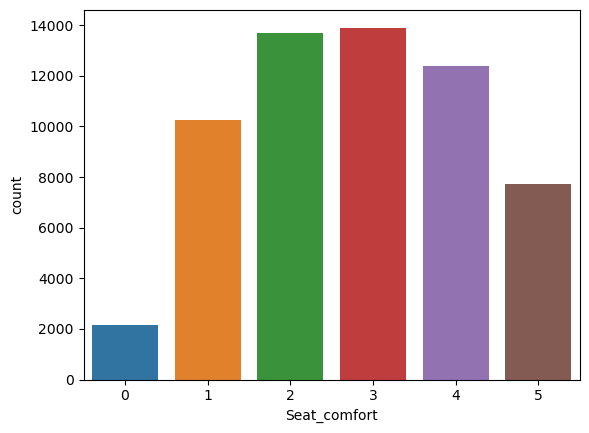

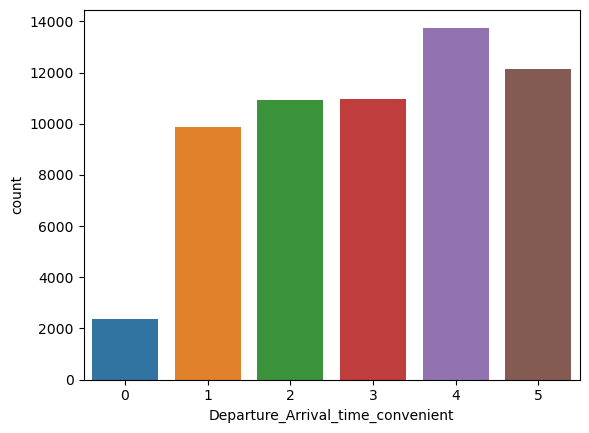

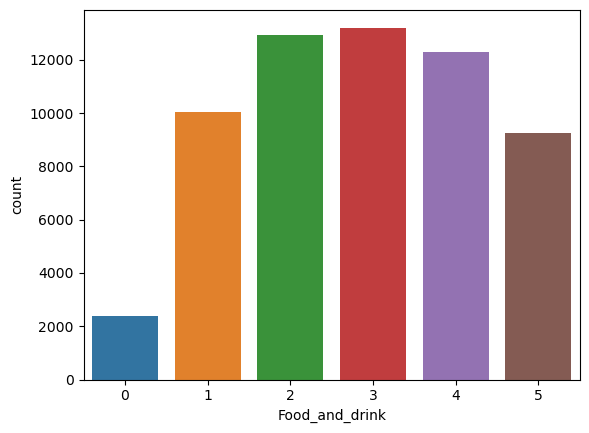

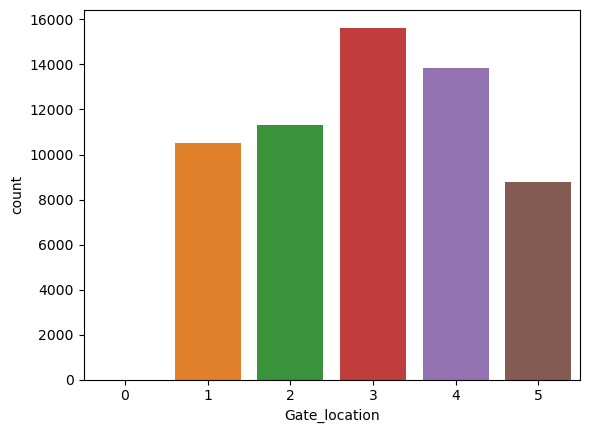

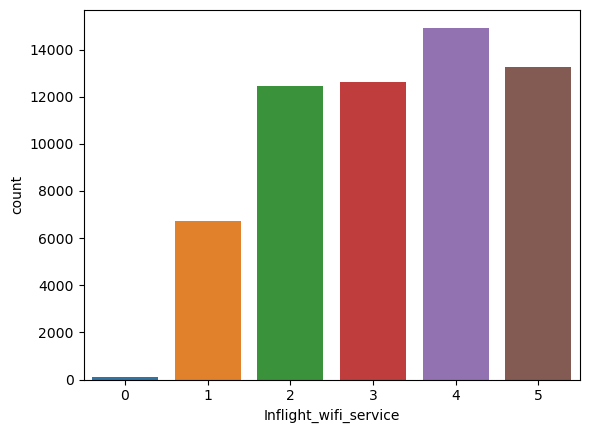

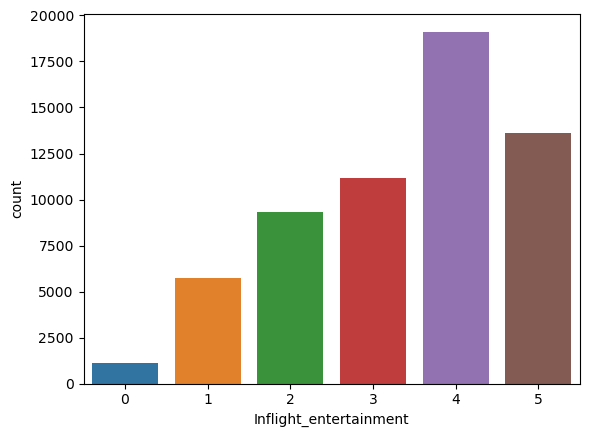

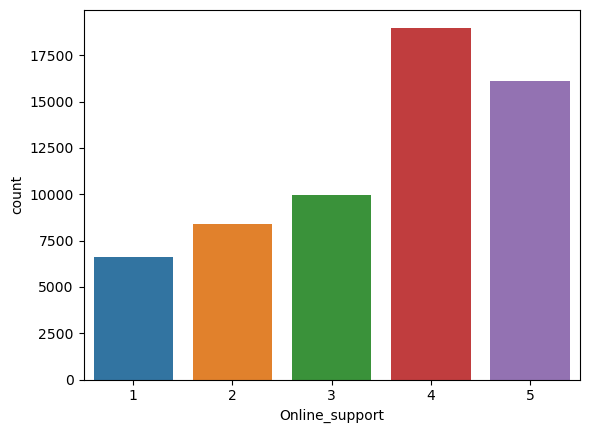

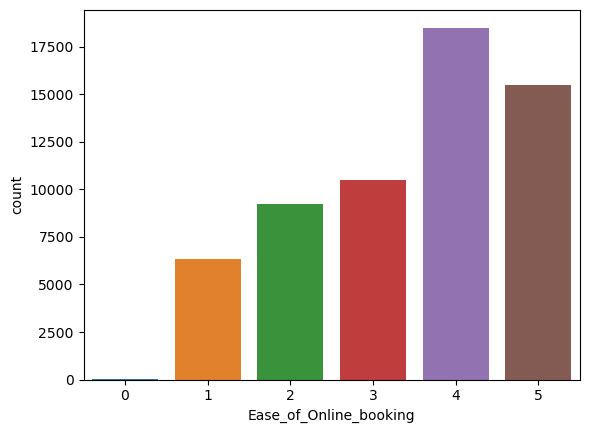

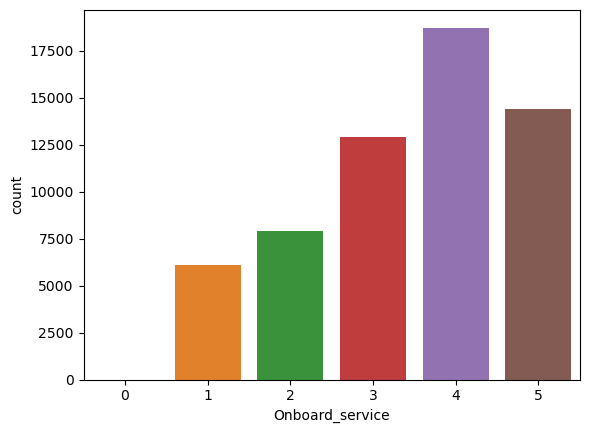

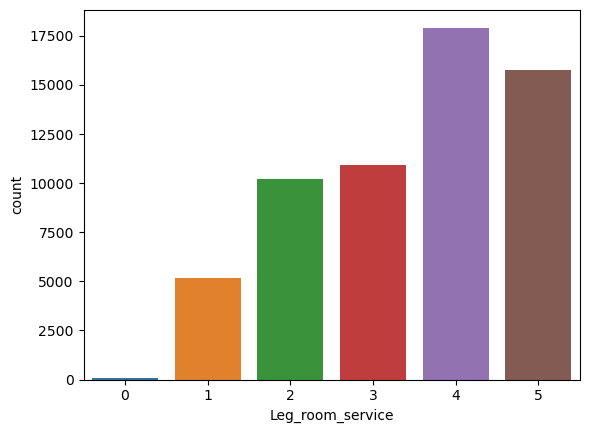

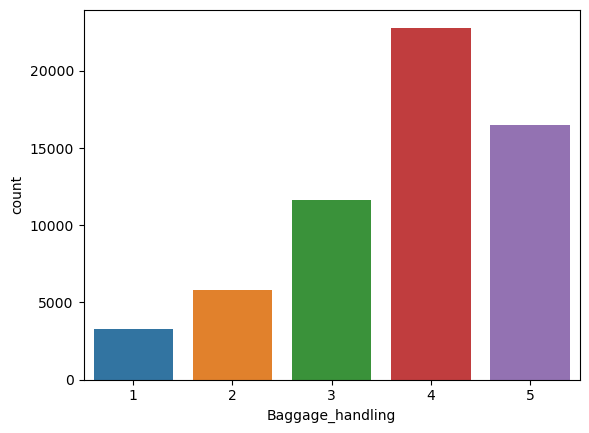

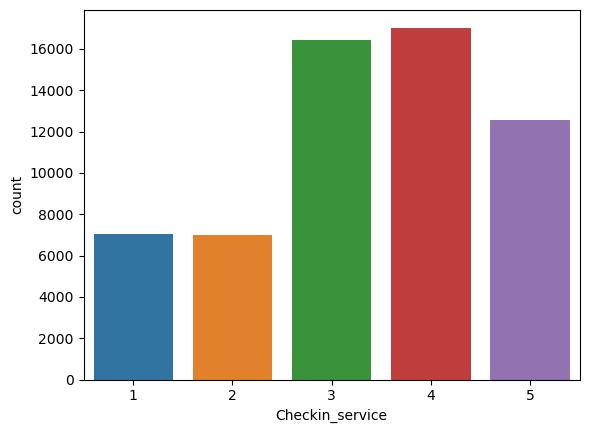

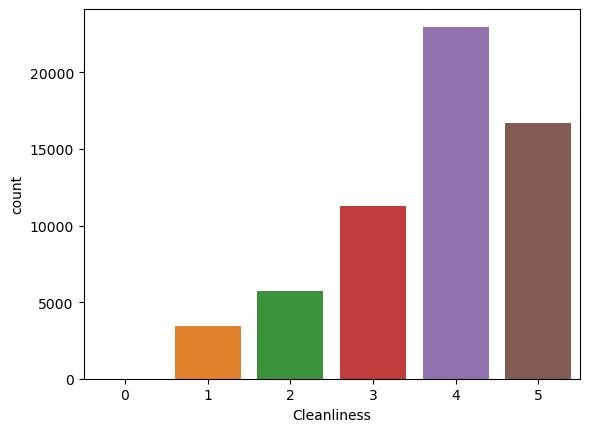

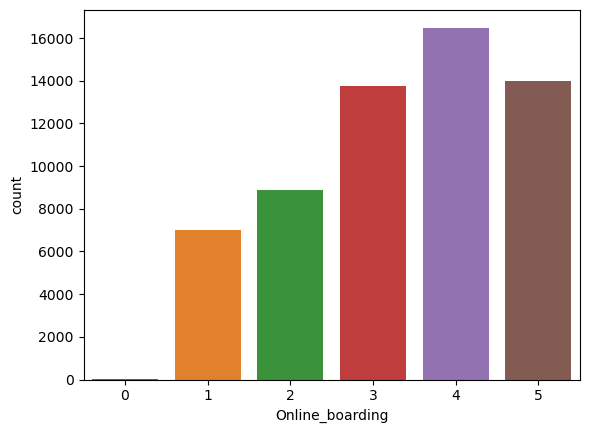

In [11]:
for i in discrete_num:
    sns.countplot(x=feature.loc[feature['Flight_Distance'] >= 2000][i])
    plt.show()

Do the same but this time flight travels less than 2000km of distance.

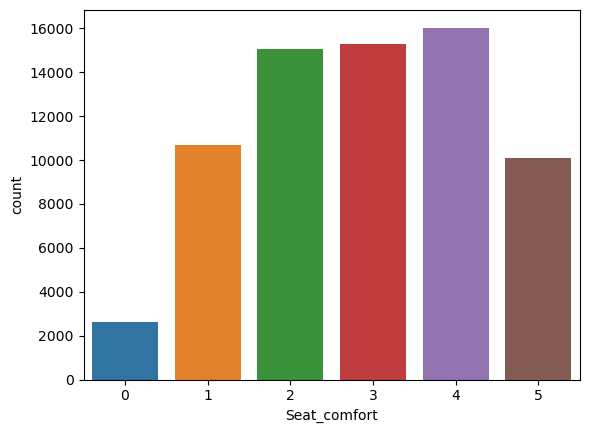

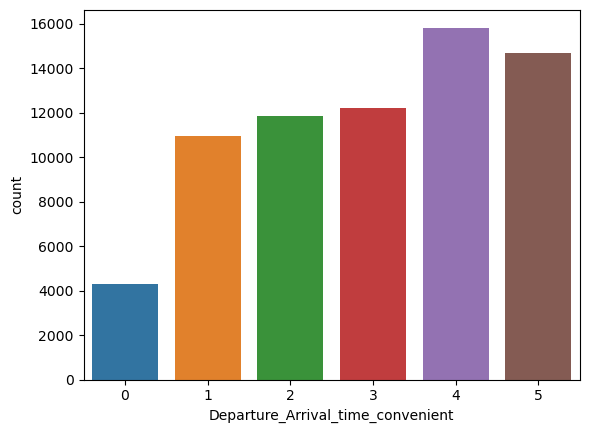

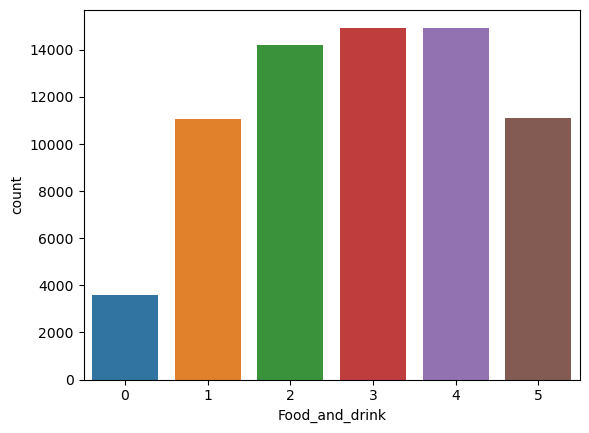

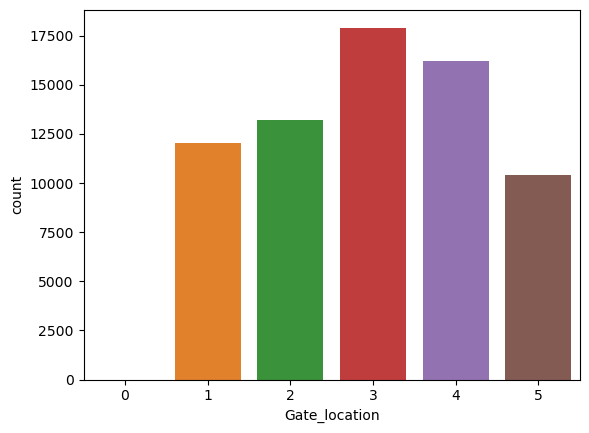

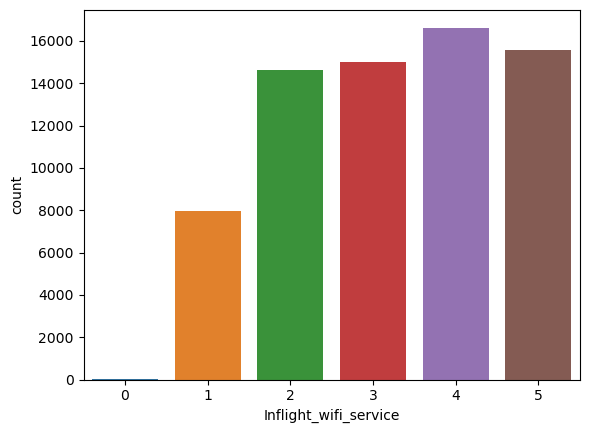

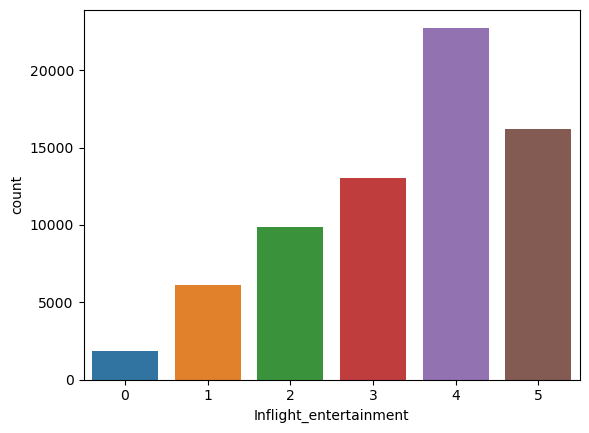

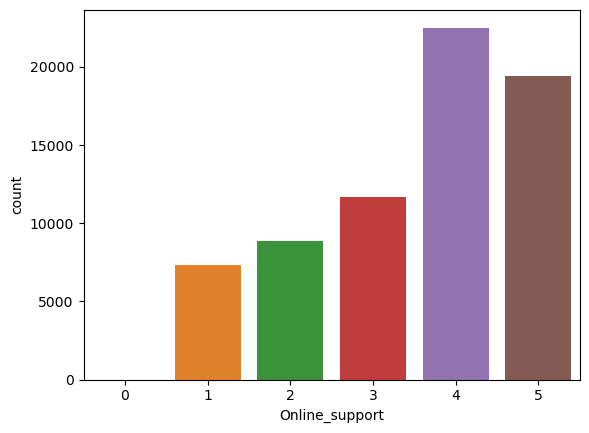

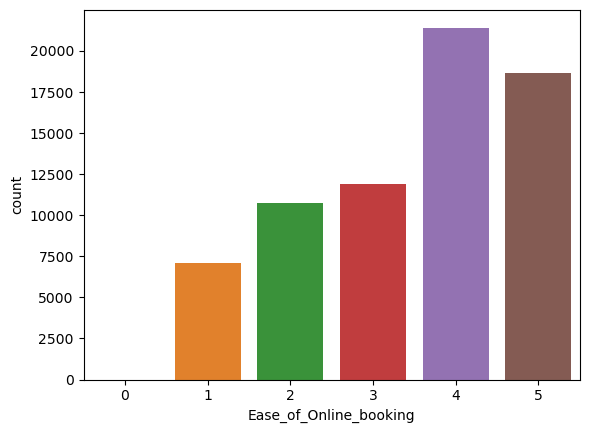

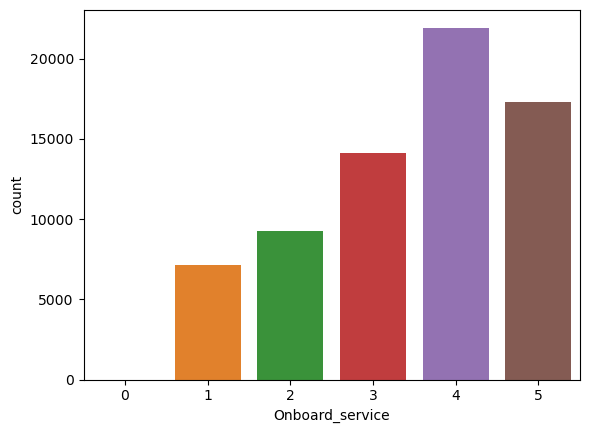

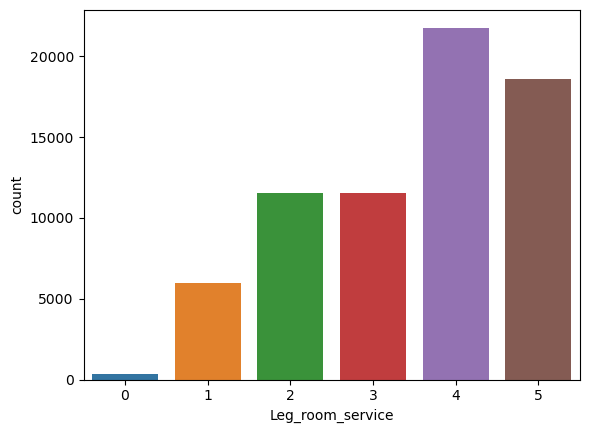

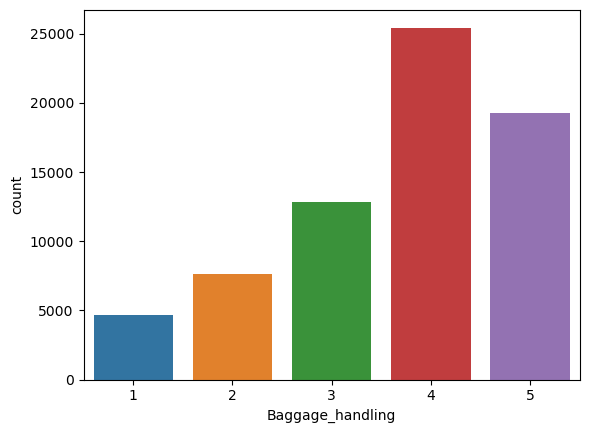

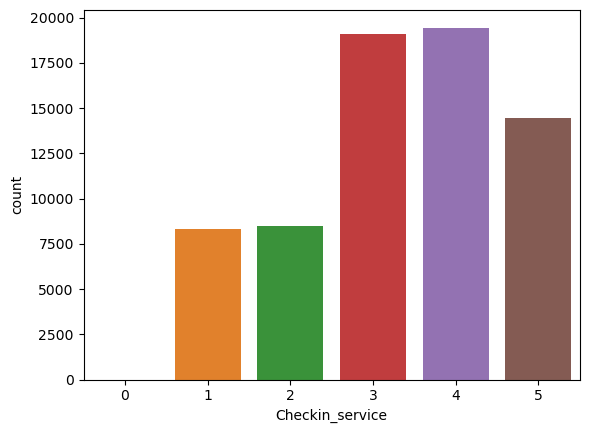

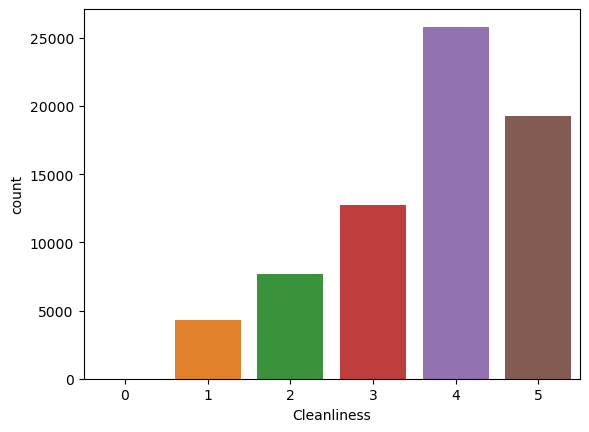

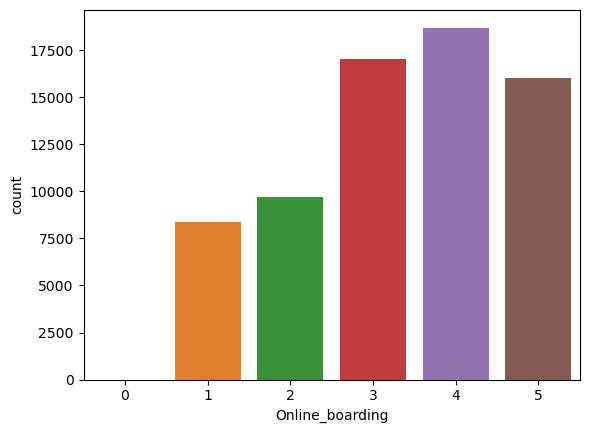

In [12]:
for i in discrete_num:
    sns.countplot(x=feature.loc[feature['Flight_Distance'] < 2000][i])
    plt.show()

Now lets compare the rate of satisfaction by using count plot on discrete features.

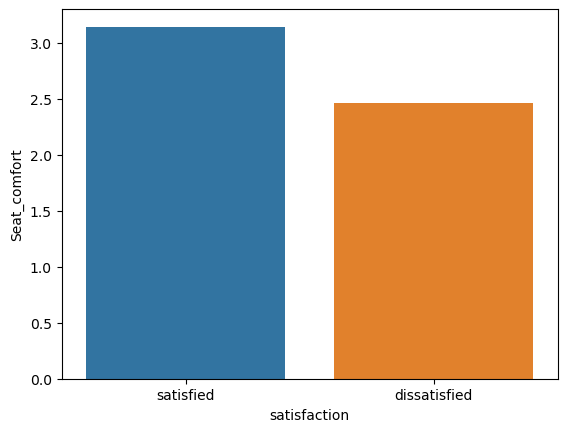

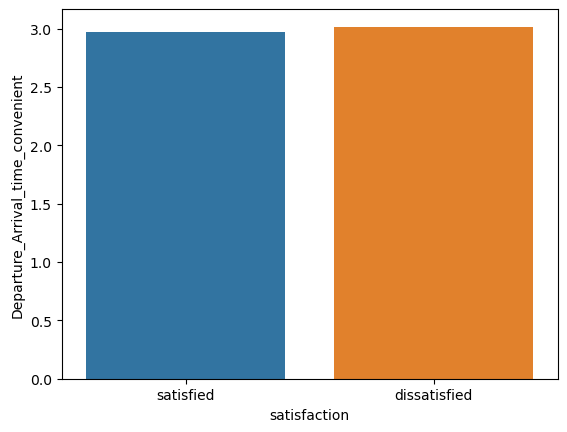

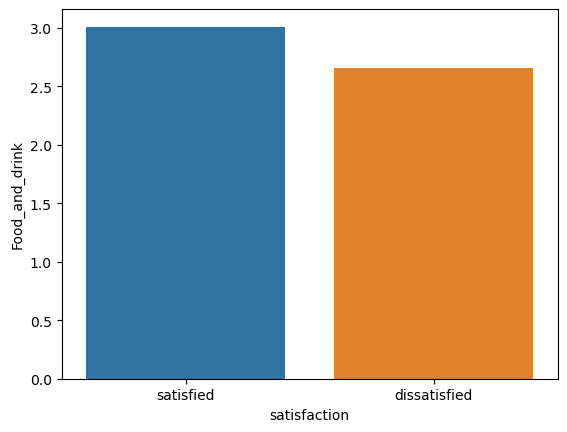

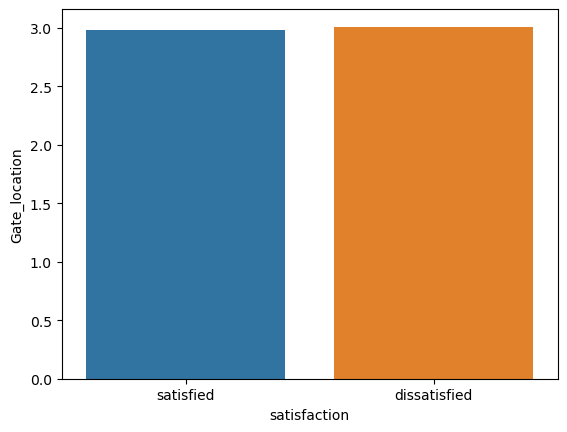

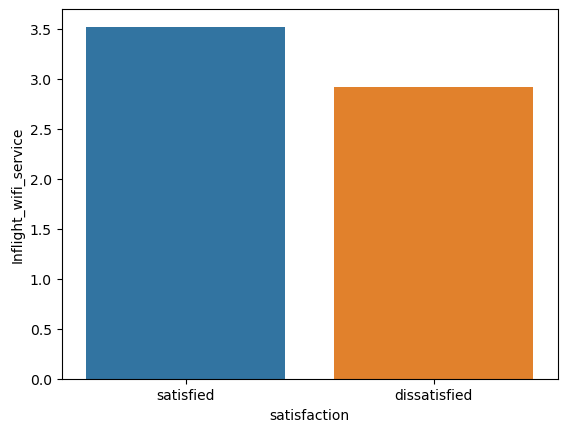

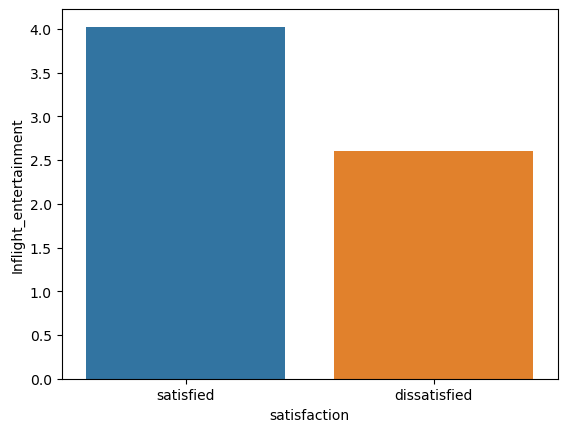

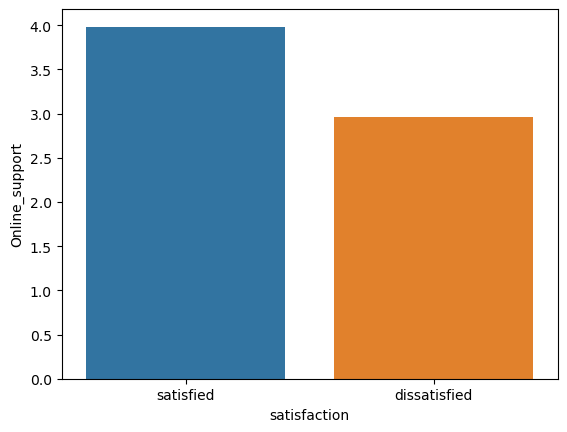

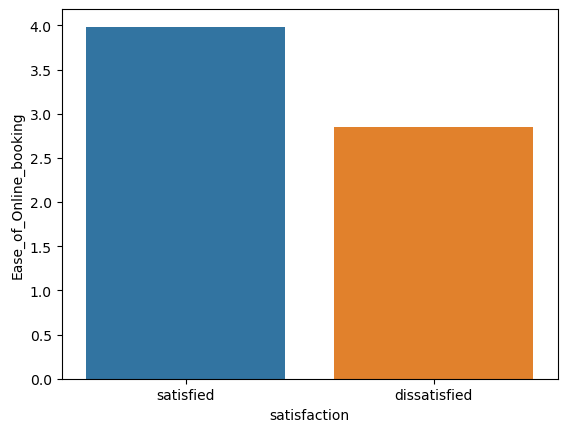

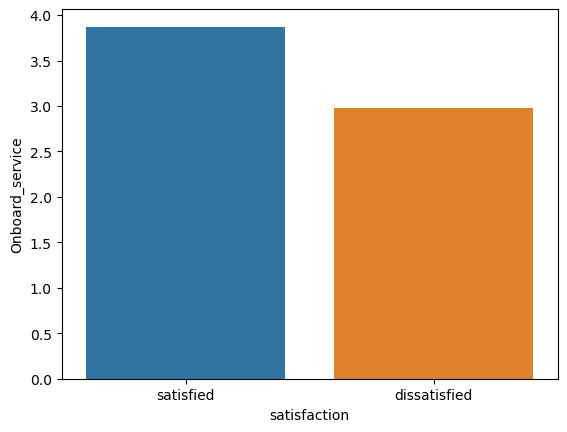

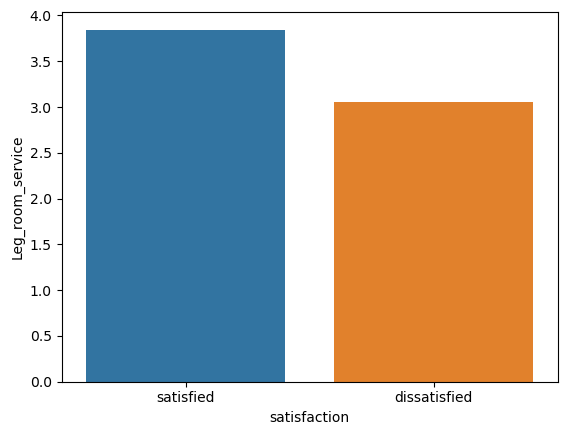

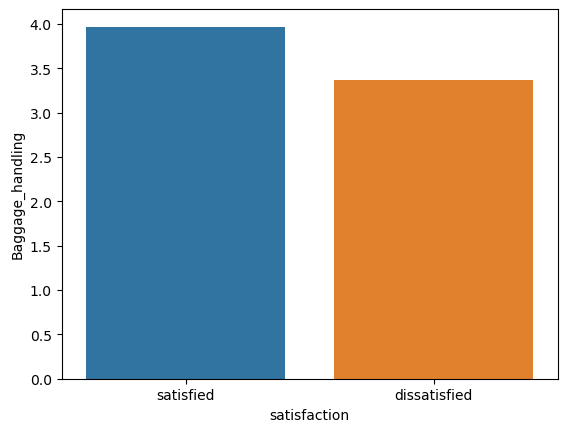

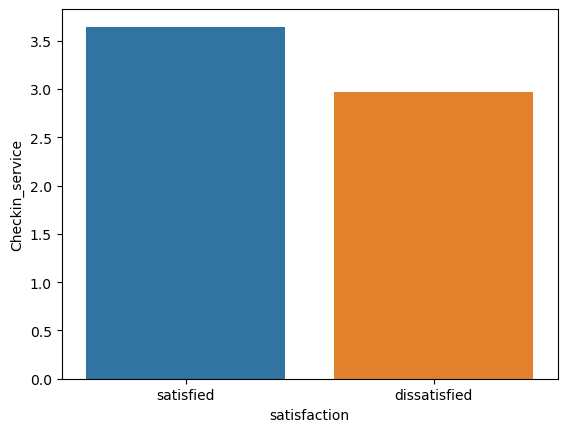

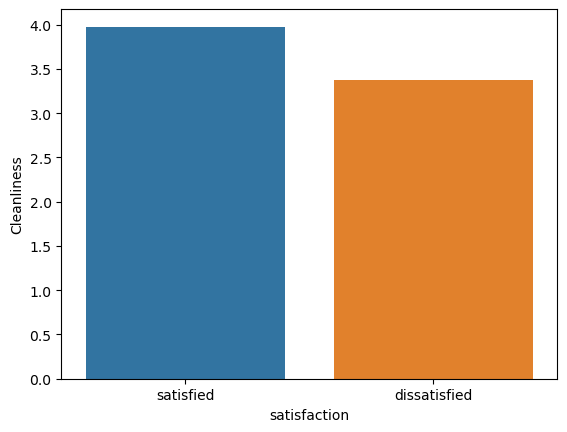

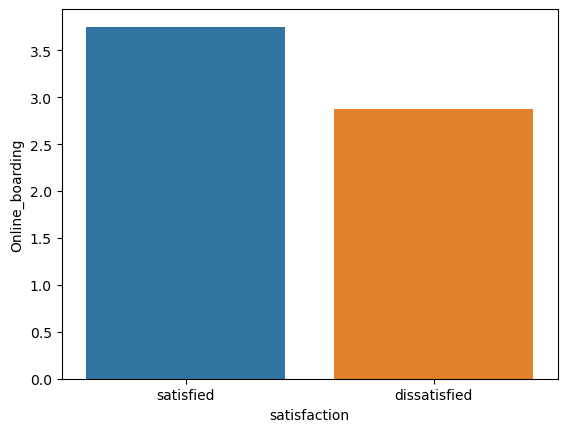

In [13]:
for i in discrete_num:
    sns.barplot(y = feature[i], x = target['satisfaction'], ci = None)
    plt.show()

Airline has done good job in almost all domains to provide comfort to customers but still there are some areas in which improvements are required such as convenient in departure/arrival time, food & drink, seat comfort,Inflight wifi service especially in location of gates.

# * Visualization of continuous features.

Lets plot some histograms.

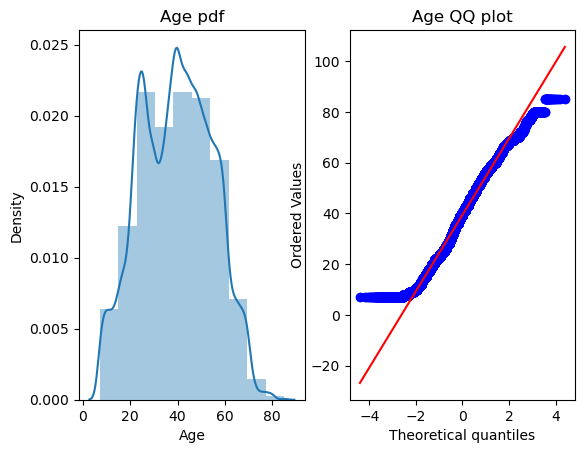

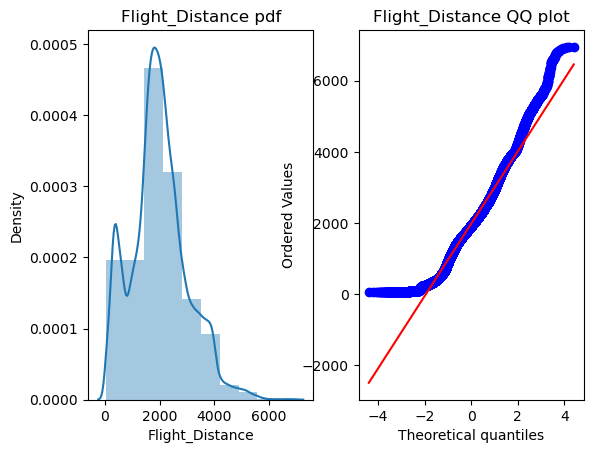

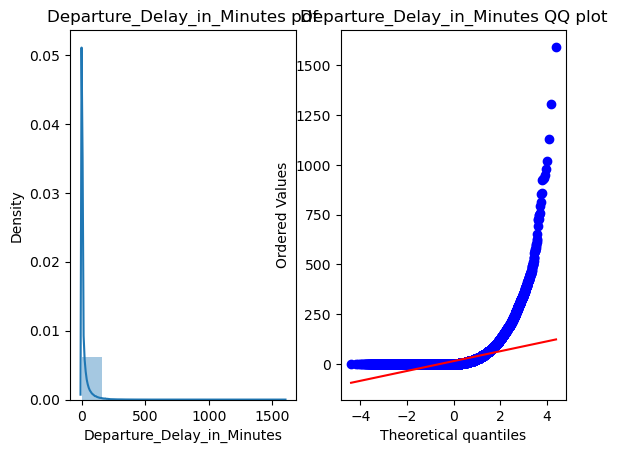

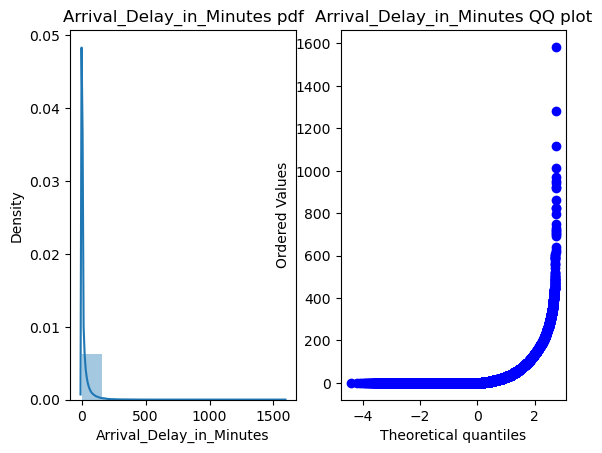

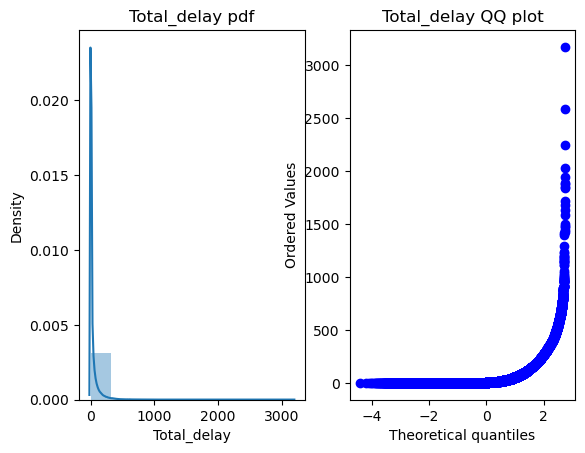

In [14]:
for i in conti_num:
    plt.subplot(121)
    sns.distplot(x = feature[i], kde = True, bins = 10)
    plt.xlabel(i)
    plt.title(i + ' pdf')
    
    plt.subplot(122)
    stats.probplot(feature[i], dist = 'norm', plot = plt)
    plt.title(i + ' QQ plot')
    plt.show()

* Probability distributon curve is plot for the contionus variables, here we can observe that age group between 20-45 are more frequent user of airlines as this age group travels because of education or business purpose.
* On an average during a journey flight covers a distance of 2000km and approx delay in flights is about 25min.
* Total, departure and arrival delay is right skewed therefore log transformation should be applied.

In [15]:
trf = FunctionTransformer(func = np.log1p)
feature['Total_delay'] = trf.fit_transform(feature['Total_delay'])

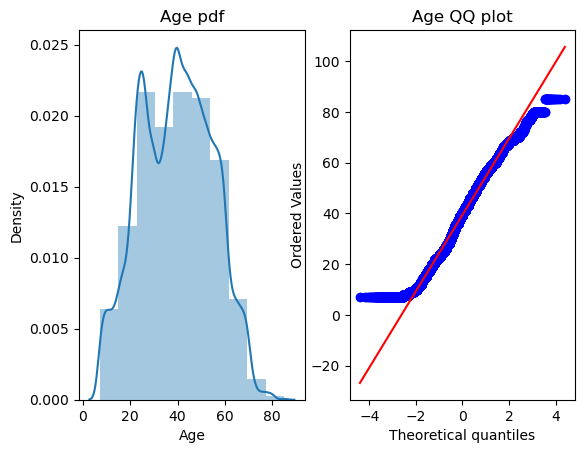

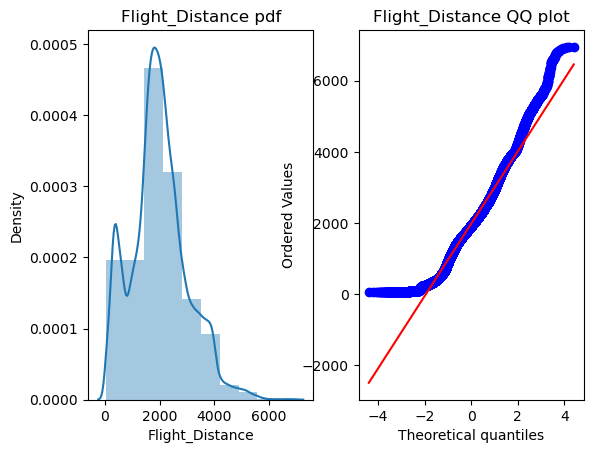

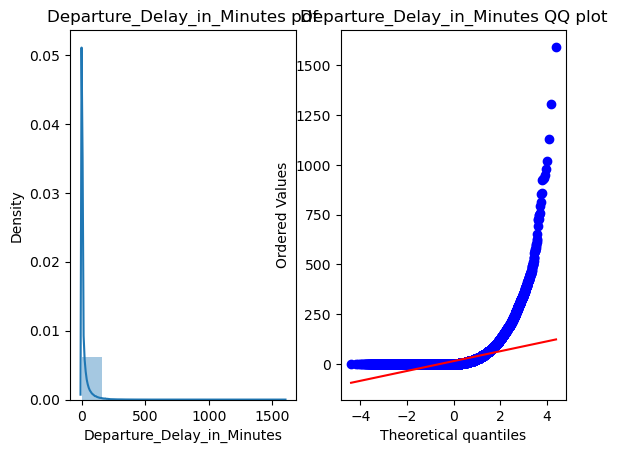

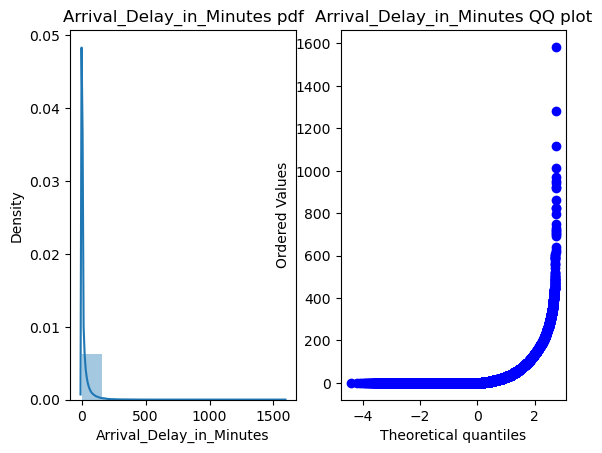

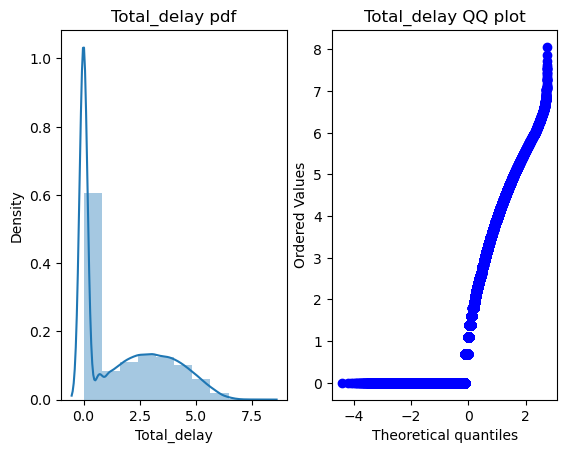

In [16]:
for i in conti_num:
    plt.subplot(121)
    sns.distplot(x = feature[i], kde = True, bins = 10)
    plt.xlabel(i)
    plt.title(i + ' pdf')
    
    plt.subplot(122)
    stats.probplot(feature[i], dist = 'norm', plot = plt)
    plt.title(i + ' QQ plot')
    plt.show()

# * Visualization of categorical features.
Lets plot some count and pie plots.

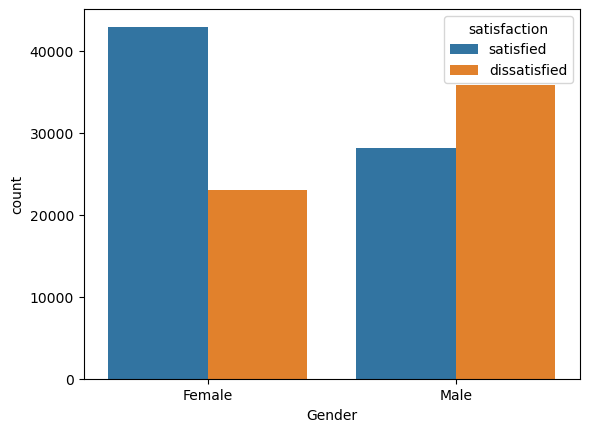

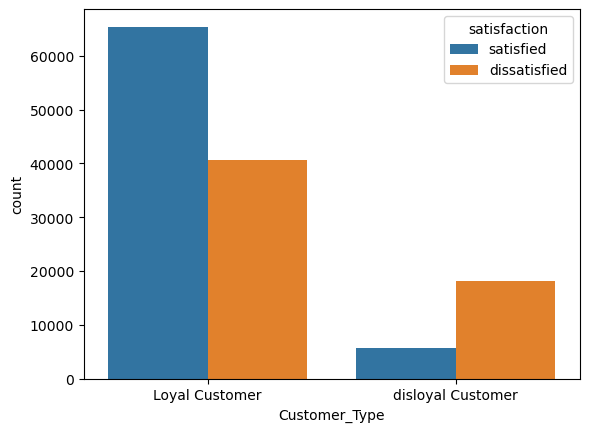

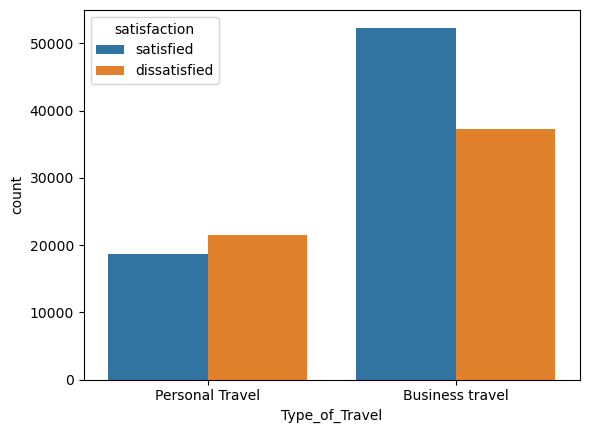

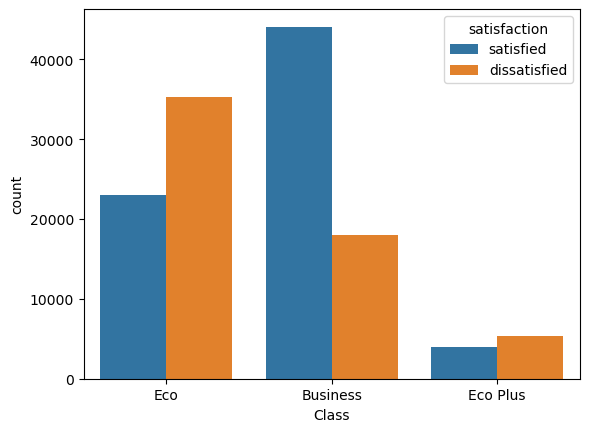

In [17]:
for i in cat_var:
    sns.countplot(x=feature[i], hue = target["satisfaction"])
    plt.show()

* Bar graph is plotted for comparison between categorical and target variables, here we can see that satisfactory rate of female passengers are more with respect to male passengers and vice-versa.
* Loyal customers are more satisfied in compare to disloyal so main focus is to increase the satisfactory rate of loyal one's and convert disloyal's to loyal's.
* Persons who travelling for business purpose are more likely to have satisfied than personal one's. 
* Business class provide more comfort to the passenger rather than eco & eco plus.

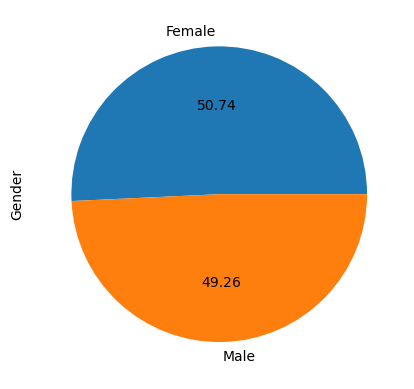

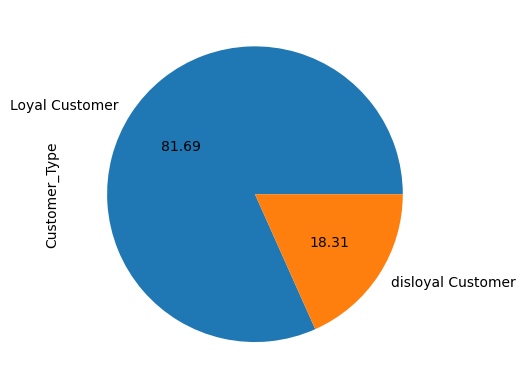

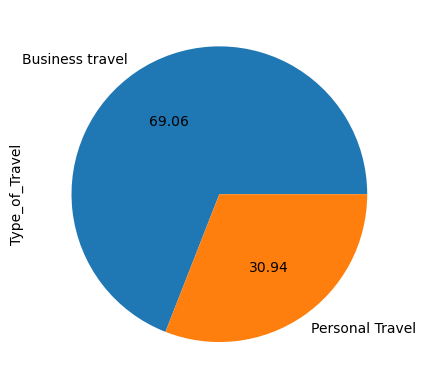

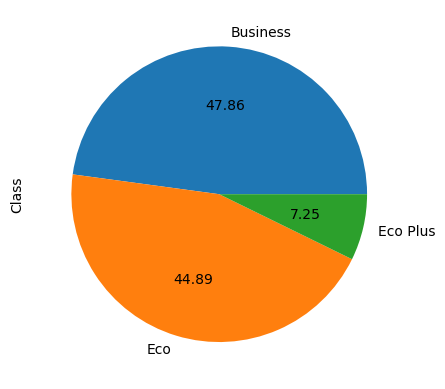

In [18]:
for i in cat_var:
    feature[i].value_counts().plot(kind='pie', autopct = '%.2f')
    plt.show()

* With respect to gener number of male and female passenger are almost same.
* Airline has about 80% passengers as loyal which is a positive sign for the them.
* More number of passengers are travelling due to business related reasons so magazines related to finance should be made available during their journey.
* Majority of classes booked by passengers are business and economy class.

In [19]:
feature.groupby(["Customer_Type"]).Age.mean()

Customer_Type
Loyal Customer       41.462008
disloyal Customer    30.352565
Name: Age, dtype: float64

Here we can see that passengers who are nearly 40 are loyal to the airlines rather than young one's.

In [20]:
feature.groupby(["Customer_Type"]).Total_delay.mean()

Customer_Type
Loyal Customer       1.674053
disloyal Customer    1.699940
Name: Total_delay, dtype: float64

One thing is clear that delay in flights is not a sign for loyality or disloyality of passengers.

In [21]:
feature.groupby(["Customer_Type"]).agg({'Flight_Distance':'mean'})

,Flight_Distance
Customer_Type,
Loyal Customer,1972.200349
disloyal Customer,2022.495837


So both of them are travelling nearly 2000km of distance.

# * Multivariate analysis.

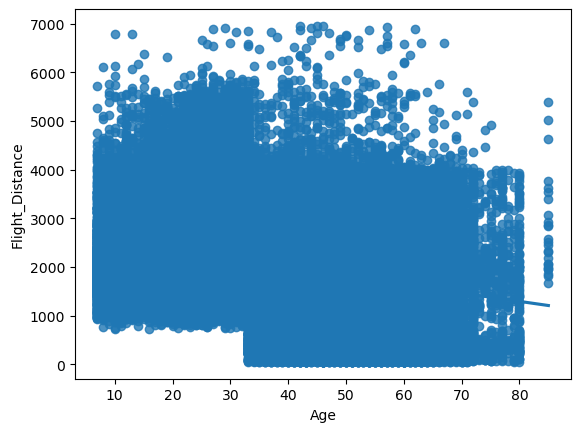

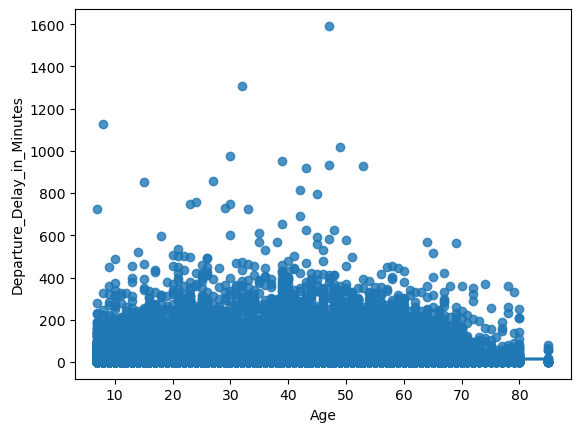

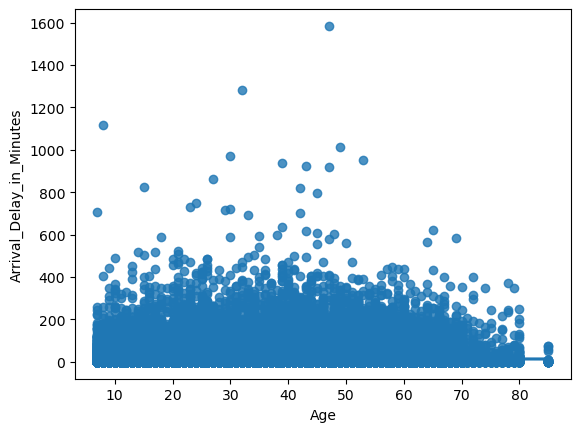

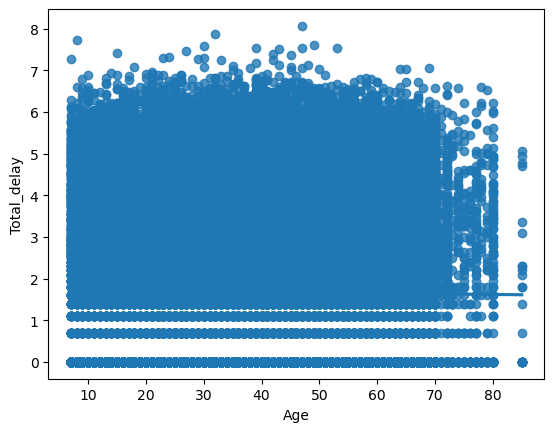

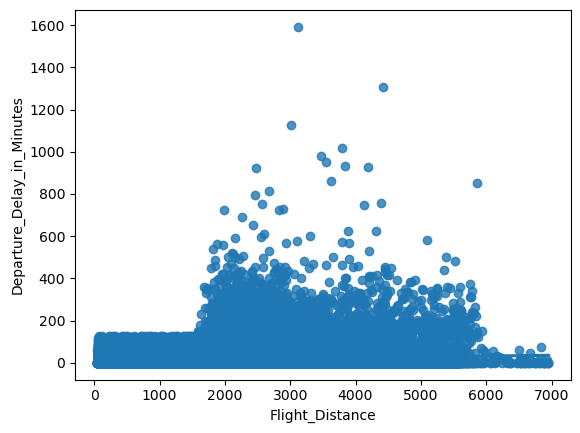

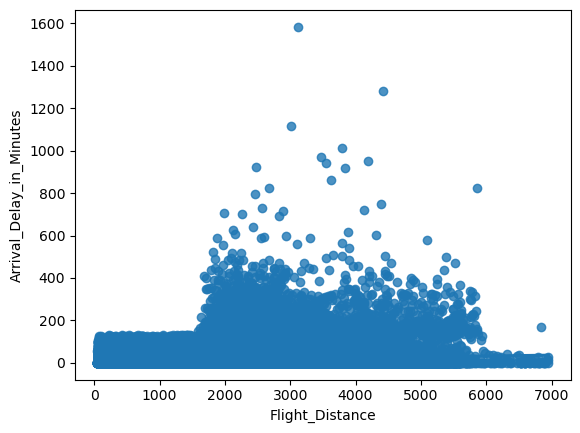

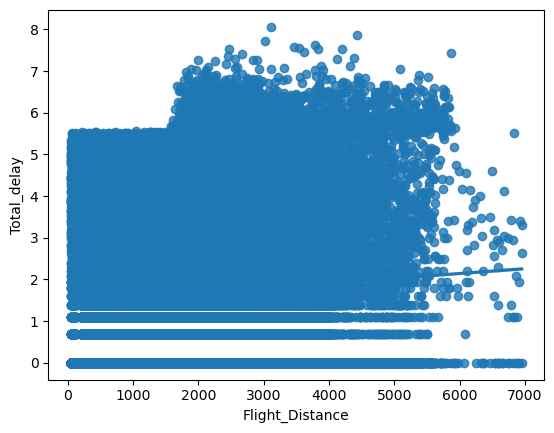

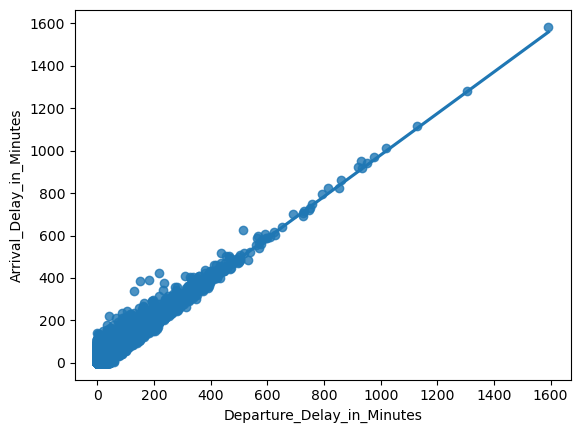

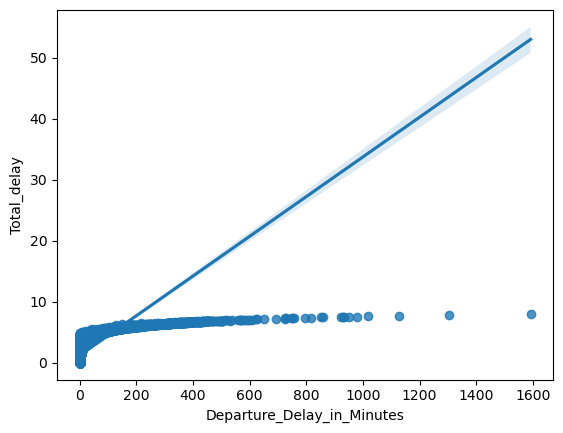

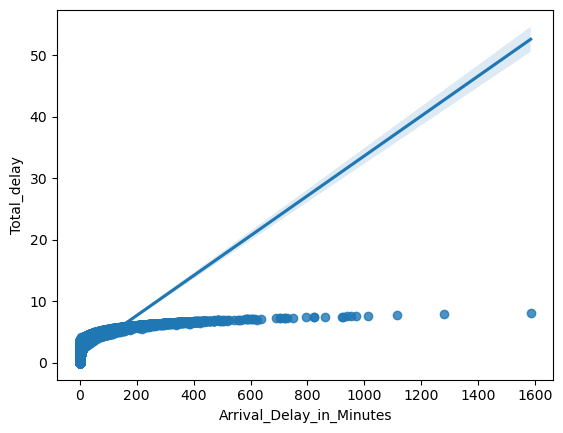

In [22]:
for i in range(len(conti_num)):
    for j in range(i+1, len(conti_num)):
        sns.regplot(x = feature[conti_num[i]], y = feature[conti_num[j]], scatter=True)
        plt.show()

Some major points are:
* Passenger like to travel less distance with increase in their age.
* If there is any delay in departure then there will be delay in arrival and vice-versa.

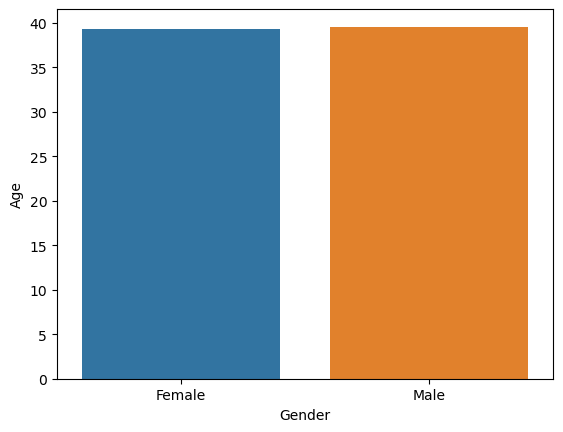

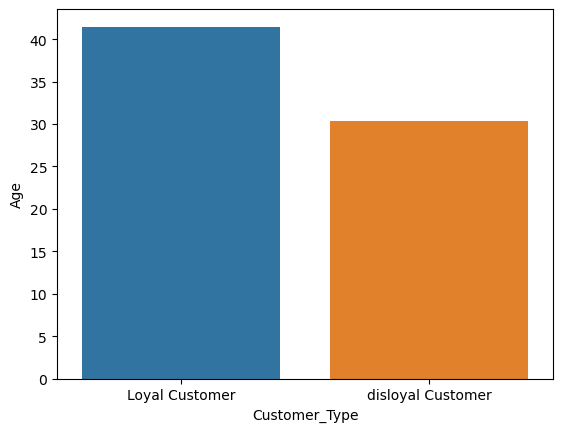

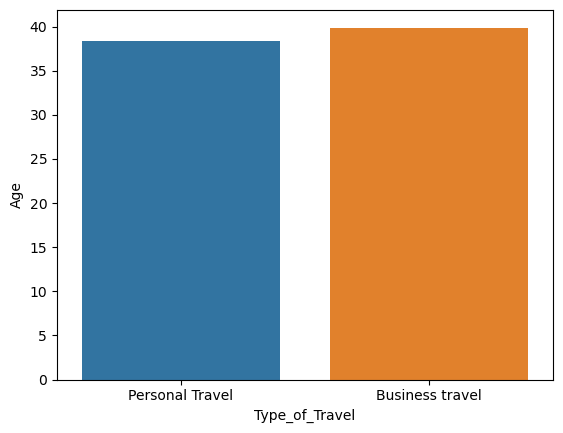

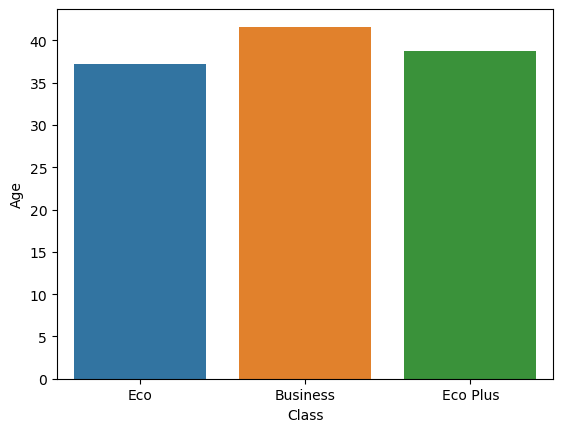

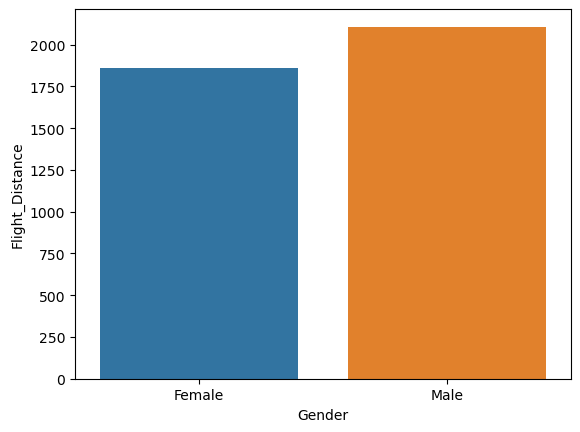

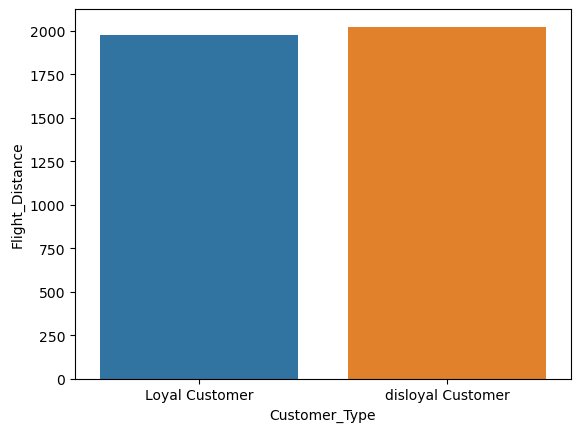

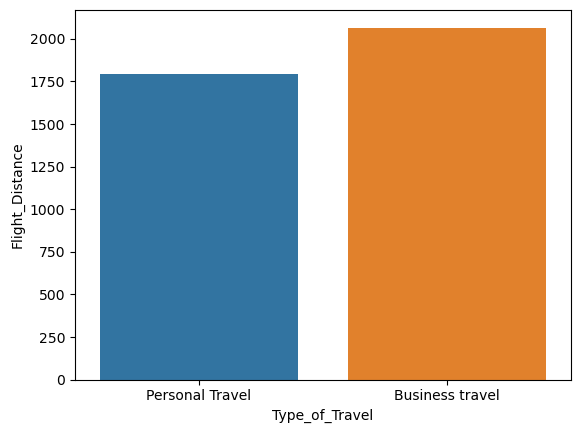

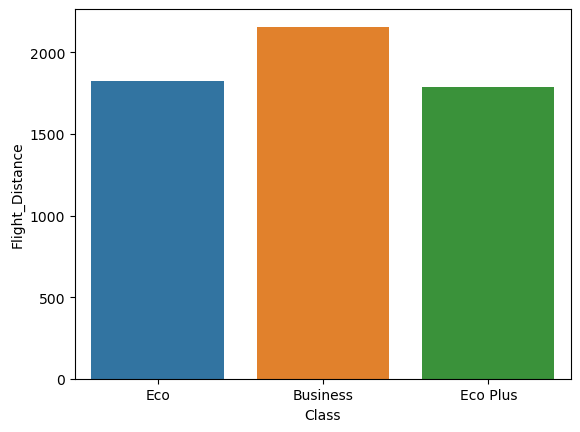

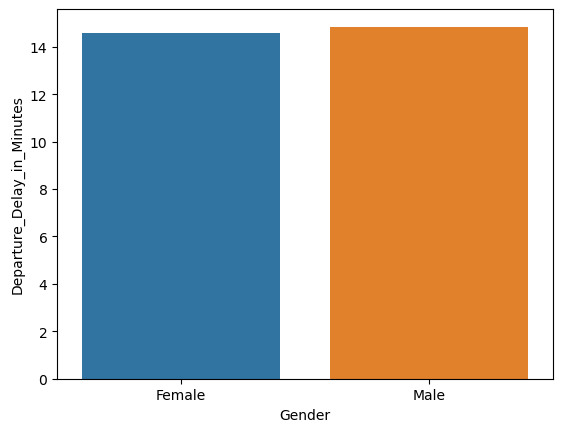

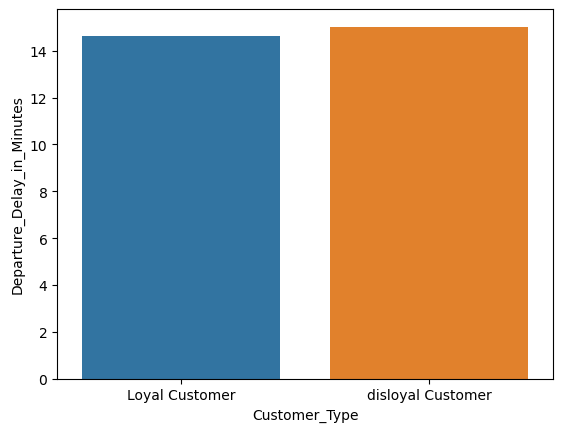

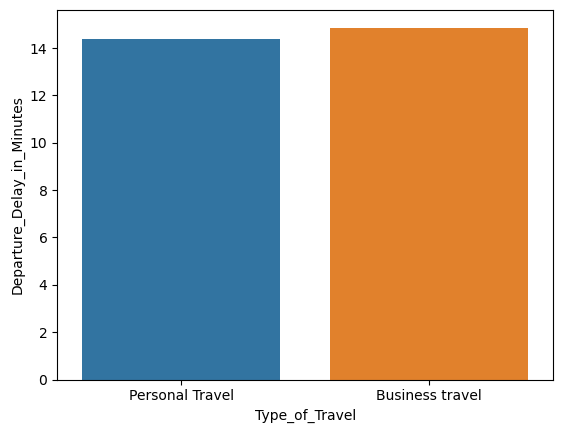

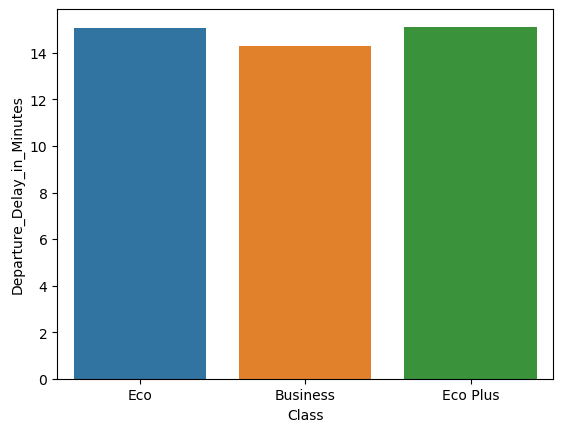

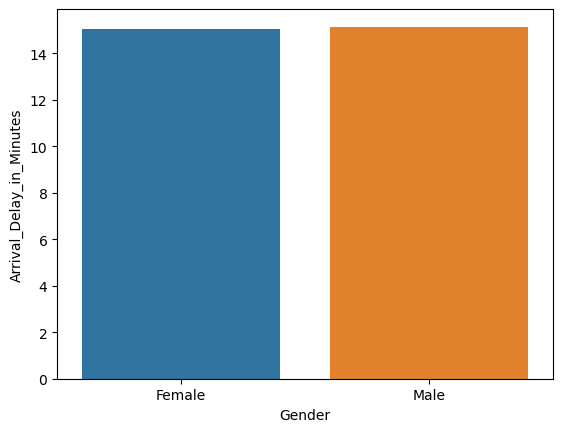

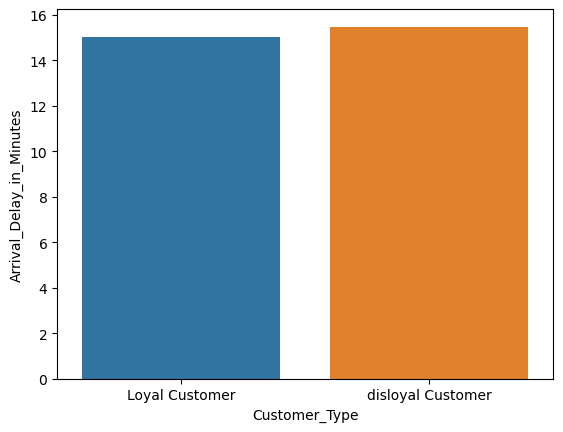

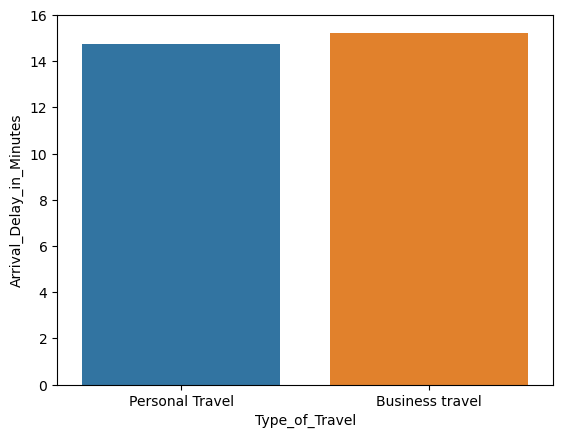

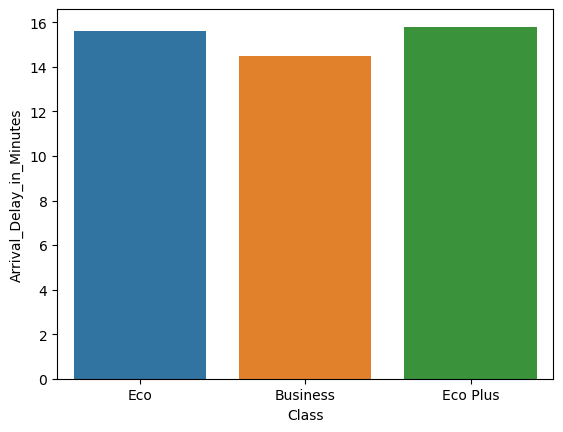

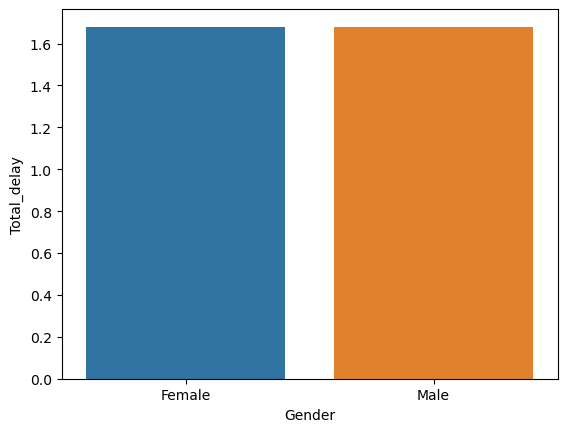

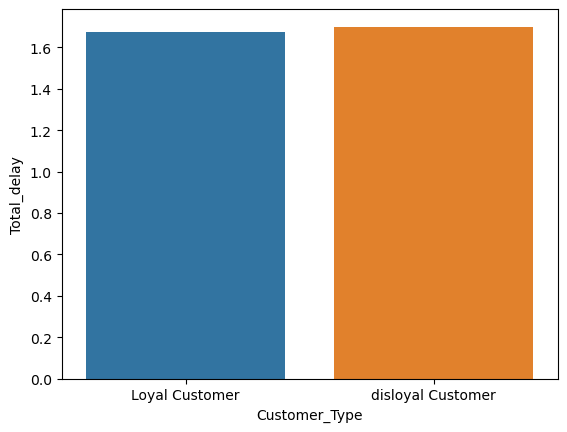

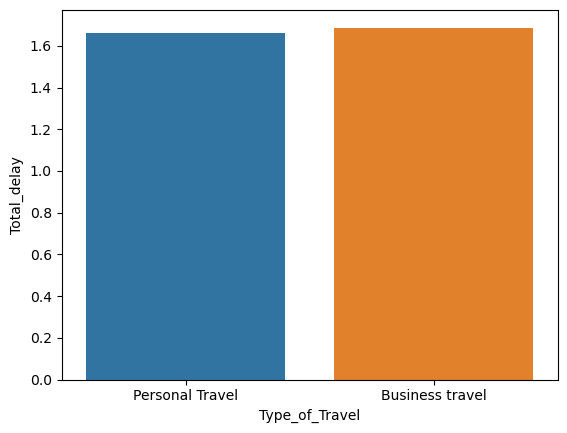

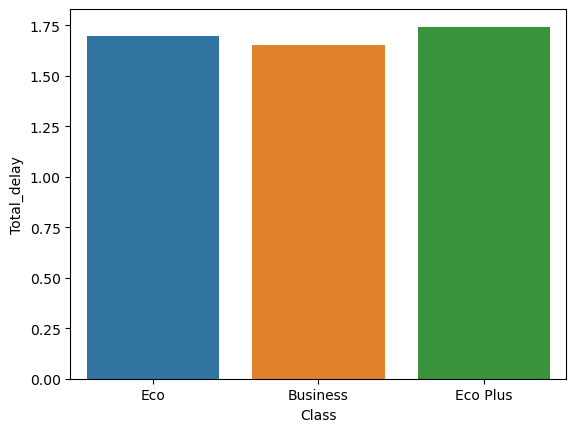

In [23]:
for i in range(len(conti_num)):
    for j in range(len(cat_var)):
        sns.barplot(y = feature[conti_num[i]], x = feature[cat_var[j]], ci = None)
        plt.show()

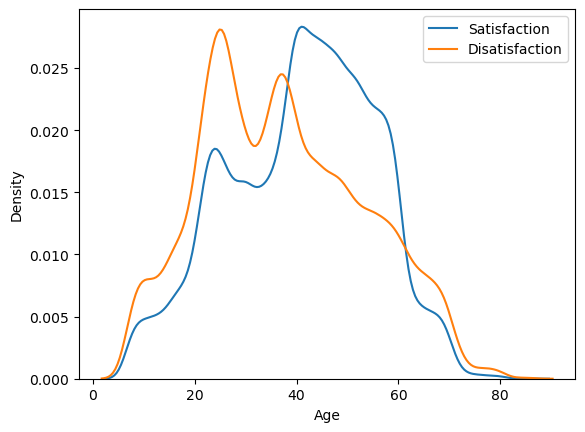

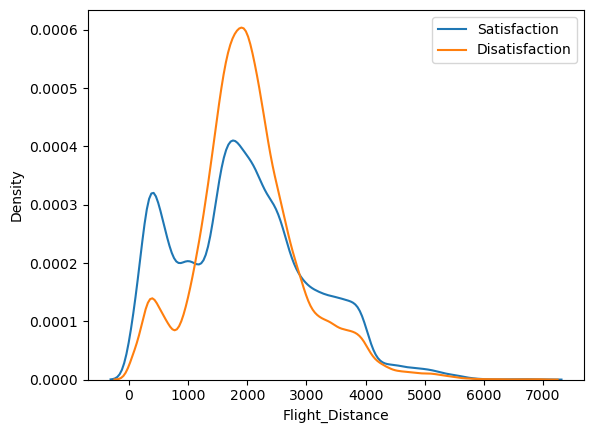

In [24]:
for i in ['Age', 'Flight_Distance']:
    sns.distplot(df[df['satisfaction']=='satisfied'][i], hist = False, label = "Satisfaction")
    sns.distplot(df[df['satisfaction']=='dissatisfied'][i], hist = False, label = "Disatisfaction")
    plt.legend()
    plt.show()

Some important points:
* Below 40 yeras of age, passengers are more tend to dissatisaction and between 40 to 60 are most probably satisfied.
* When flight travels between distance of 1200 to 2800 probability of dissatification increases.

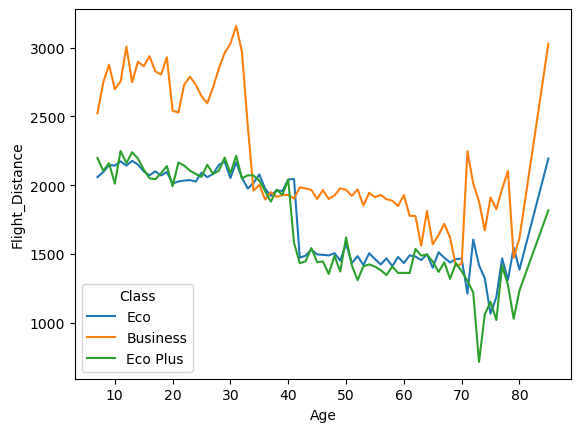

In [25]:
sns.lineplot(x = feature['Age'],y = feature['Flight_Distance'],hue = feature['Class'], ci = None)
plt.show()

Some noticeable points:
* Age group between 40 to 60 are probably more satisfied as they are travelling less distances on the other hand age group of 0 to 40 are travelling more distance approx 2000km are probably more dissatisfied.
* Airline needs to focus more on long distance flights service especially in the facilities of business class

# * Outlier detection
1. Discrete features

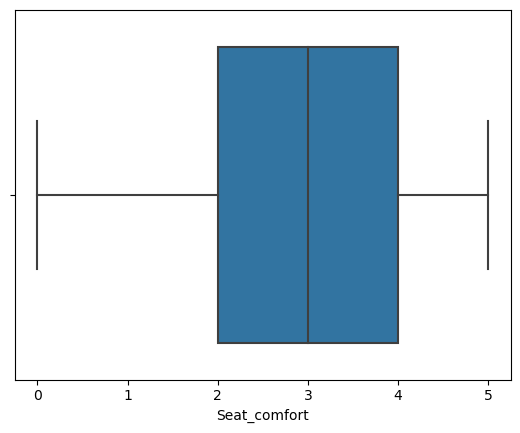

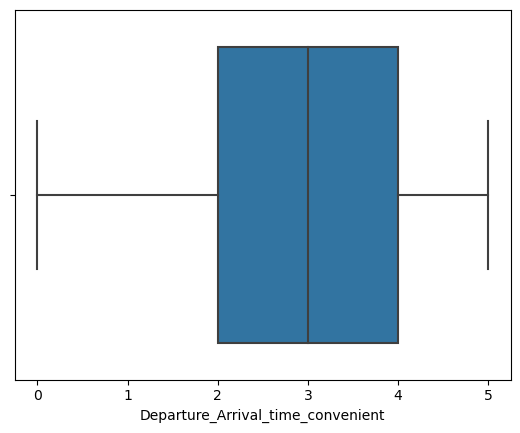

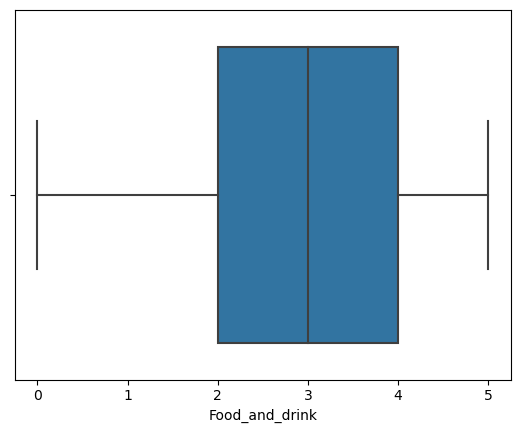

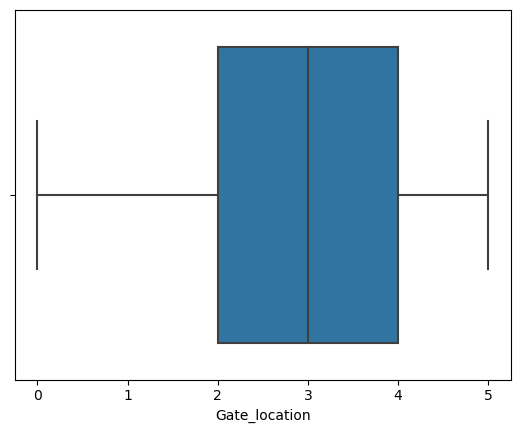

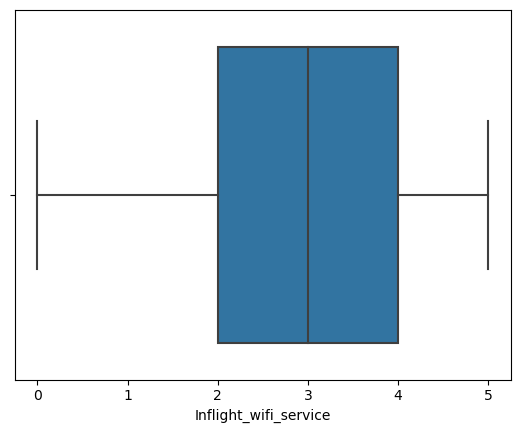

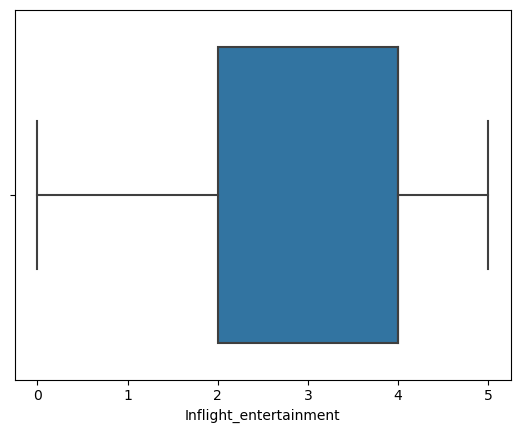

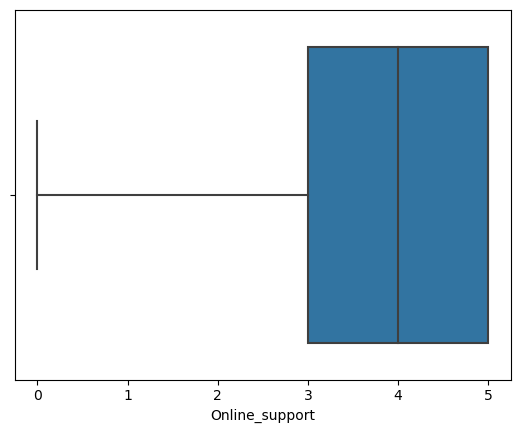

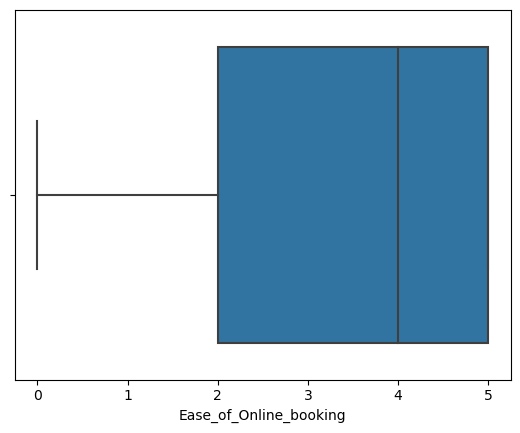

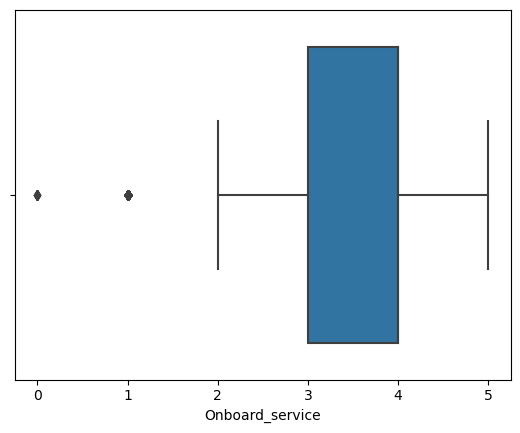

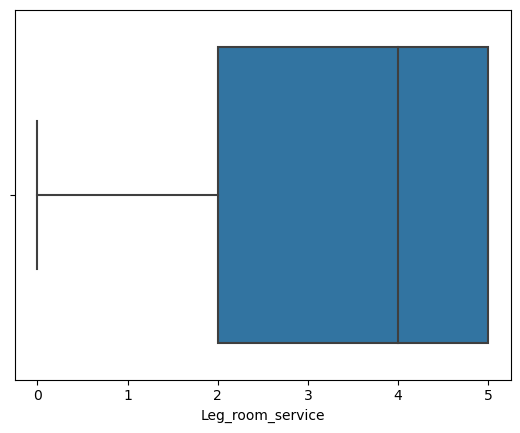

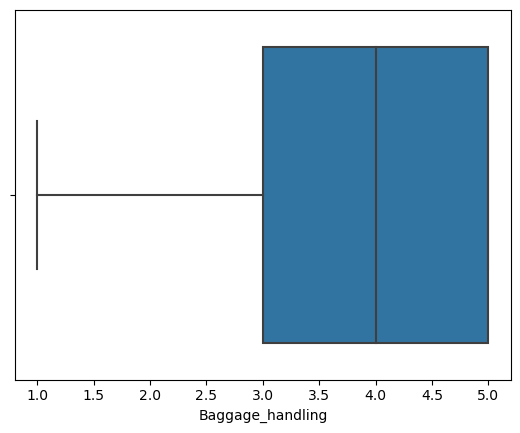

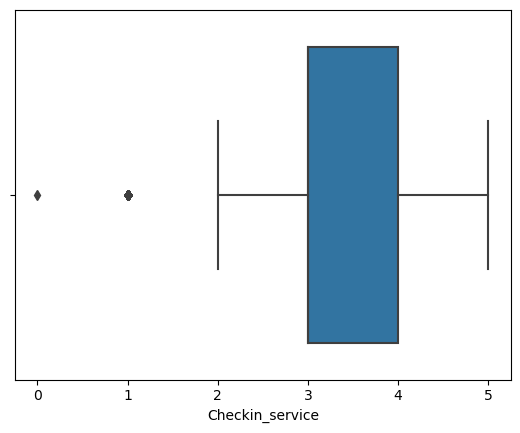

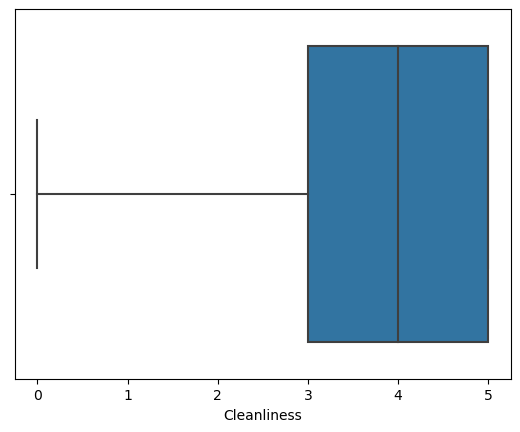

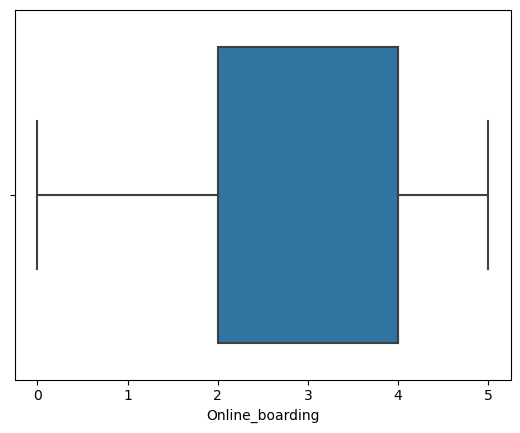

In [26]:
for i in discrete_num:
    sns.boxplot(feature[i])
    plt.show()

2. Continuous features

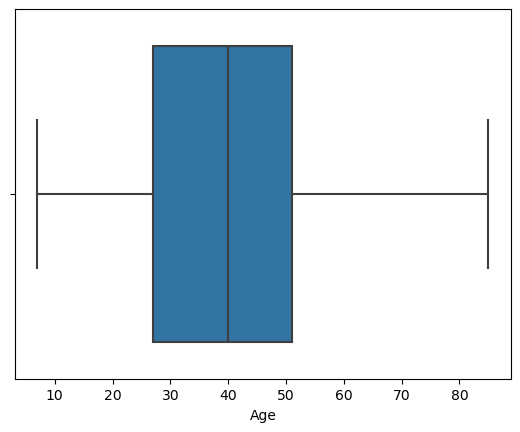

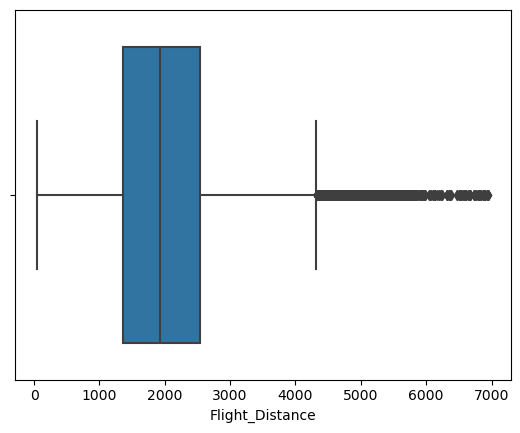

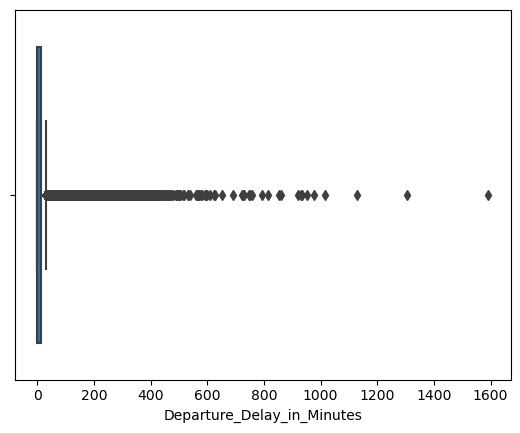

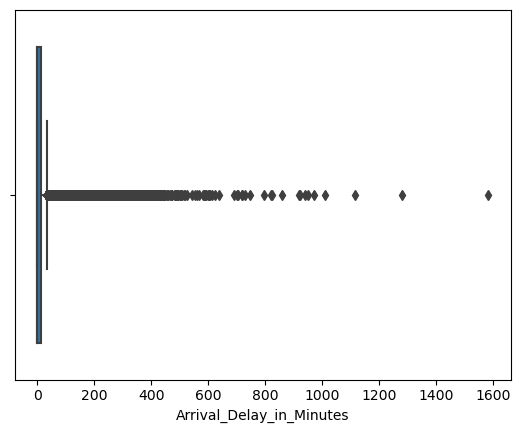

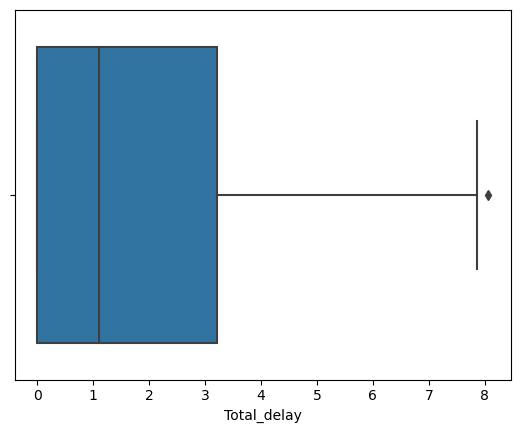

In [27]:
for i in conti_num:
    sns.boxplot(feature[i])
    plt.show()

Discrete:
* It seems that there are some potential outliers in checkin service and on board service.

Continuous:
* Flight distance and delay contains outliers which need to be cure before model training.